<div style="background-color:#000;"><img src="pqn.png"></img></div>

## Fetch and prepare TLT data for analysis

We begin by downloading historical data for TLT, a long-term treasury bond ETF, using Yahoo Finance. We specify a start and end date to get data over a specific period. We then calculate the log returns to understand the percentage change in price.

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf

In [20]:
tlt = yf.download("TLT", start="2002-01-01", end="2024-06-30")
tlt["log_return"] = np.log(tlt["Adj Close"] / tlt["Adj Close"].shift(1))

[*********************100%***********************]  1 of 1 completed


This code fetches the adjusted closing prices for TLT from Yahoo Finance. It then calculates the log returns, which provide a continuous compounding measure of the rate of return. Log returns are useful because they are symmetric and additive over time. The `shift(1)` function aligns the prices for the current and previous day to compute the return. This creates a new column in our DataFrame to store log returns for each trading day.

## Analyze TLT returns by calendar day of the month

We add the day of the month and year to the data. This allows us to categorize and analyze the returns based on specific days. We then compute the average log return for each day of the month and visualize it with a bar plot.

<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

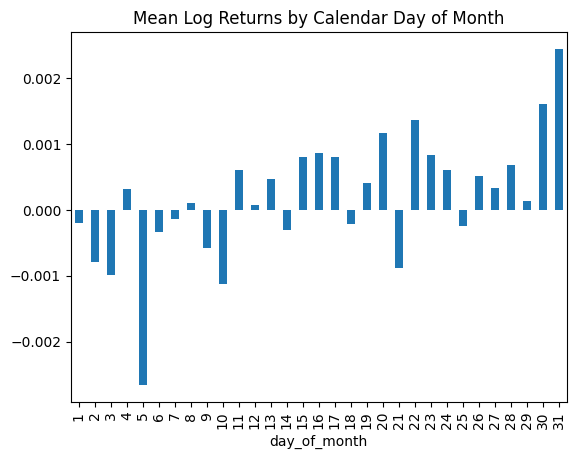

In [21]:
tlt["day_of_month"] = tlt.index.day
tlt["year"] = tlt.index.year
grouped_by_day = tlt.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

The code extracts the day and year from the date index and adds them as new columns. It groups the data by the day of the month to calculate the mean log return for each day. This aggregation helps identify patterns or anomalies in returns on specific days. We use a bar plot to visualize these average returns, making it easier to spot trends or outliers.

## Compare returns from the first and last week of each month

We create two new columns to store returns for the first and last week of each month. We then calculate the difference between these two to analyze how returns change from the beginning to the end of the month.

In [22]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

In [23]:
tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return

In [24]:
tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

This section initializes two new columns to zero to store returns for specific weeks. It assigns log returns to `first_week_returns` for days 1 through 7 and to `last_week_returns` for days 23 through the end of the month. We calculate a new column `last_week_less_first_week` to find the difference between these two periods. This difference helps evaluate whether there are systematic return patterns between the start and end of the month.

## Visualize yearly and cumulative strategy returns

We analyze the strategy returns by year and visualize them using bar plots. We also compute the cumulative returns over time, both annually and daily, to understand the overall performance of the strategy.

<Axes: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

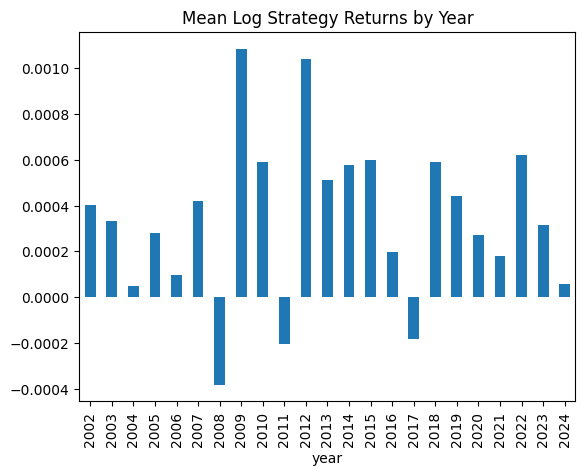

In [25]:
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

<Axes: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

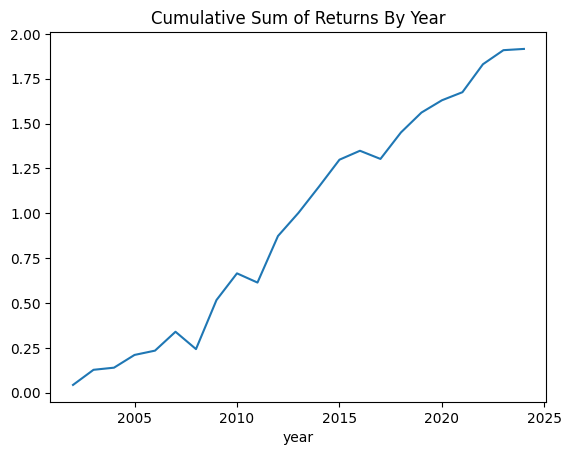

In [26]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

<Axes: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

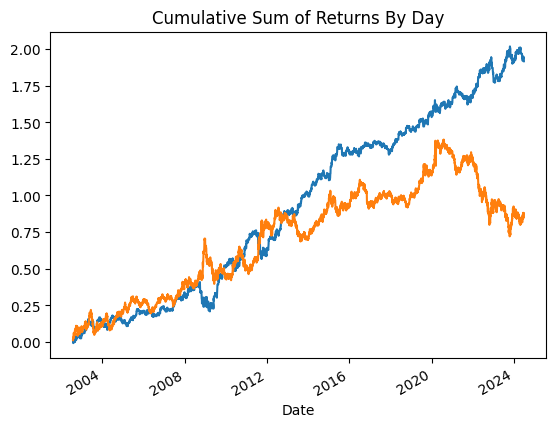

In [27]:
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")
tlt.log_return.cumsum().plot()

We group the data by year and compute the average of `last_week_less_first_week` to understand annual performance. We use bar plots to visualize these yearly averages. To assess the long-term effectiveness, we calculate cumulative returns by summing up the yearly returns and plotting them. The cumulative plot by days gives a continuous view of the strategy's performance over the entire period. It helps visualize the growth or decline of investments over time, offering insights into the strategy's viability.

## Your next steps

Try altering the code to analyze a different asset or time period. You can change the ticker symbol or the date range to see how returns differ. Experiment with different months to check for seasonal patterns.

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.

In [29]:
tlt.last_week_less_first_week.cumsum().iloc[-1]

1.916370599071687